# FOURIER AUGMENTED DICKEY FULLER TEST

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
import statsmodels.graphics.tsaplots as sgt


import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_excel("Data-2.xlsx")

critical_values_c = pd.read_excel("critical_values_c.xlsx")
critical_values_c_F = pd.read_excel("critical_values_c_F.xlsx")

critical_values_t_c = pd.read_excel("critical_values_t_c.xlsx")
critical_values_t_c_F = pd.read_excel("critical_values_t_c_F.xlsx")

### DEFINING THE VARIABLE ON WHICH THE UNIT ROOT TEST WILL BE APPLIED

In [15]:
dependent_variable = "CH"

In [16]:
def Fourier_ADF(test_level, autocorrelation, to_make_augmented, stocastics, k, add_Fourier):
  if add_Fourier == True:
    if test_level == "Level":
      y = data[dependent_variable]

      y_dif = y.diff().dropna()
      y_dif.name = dependent_variable + "_dif"
      y_dif = y_dif.reset_index(drop=True)

      y_lagged = sm.tsa.add_lag(y, lags=1)
      y_lagged = pd.Series((y_lagged[:,1:].reshape(len(y_lagged,))), name = dependent_variable + "(t-1)")

      constant = pd.Series(np.ones(len(y_dif)), name="constant")
      trend = pd.Series(np.arange(1,len(y_dif)+1), name="trend")

      sin_series = pd.Series(np.sin(2 * np.pi * k * trend / len(y_dif)), name = "sin")
      cos_series = pd.Series(np.cos(2 * np.pi * k * trend / len(y_dif)), name = "cos")

      if autocorrelation == None and to_make_augmented == None:
        if stocastics == None:
          y_independents = pd.concat([y_lagged, sin_series, cos_series], axis=1)

          model = sm.OLS(y_dif, y_independents)
          results = model.fit()
          return results

        elif stocastics == "c":
          y_independents = pd.concat([y_lagged, constant, sin_series, cos_series], axis=1)

          model = sm.OLS(y_dif, y_independents)
          results = model.fit()
          return results

        elif stocastics == "t":
          y_independents = pd.concat([y_lagged, trend, sin_series, cos_series], axis=1)

          model = sm.OLS(y_dif, y_independents)
          results = model.fit()
          return results

        elif stocastics == "t_c":
          y_independents = pd.concat([y_lagged, constant, trend, sin_series, cos_series], axis=1)

          model = sm.OLS(y_dif, y_independents)
          results = model.fit()
          return results
  #-------------------------------- Level Augemented Part
      elif autocorrelation == True and to_make_augmented!= None:
        y_dif_and_lagged = pd.DataFrame(sm.tsa.add_lag(y_dif, lags=to_make_augmented))
        column_names = []
        for i in range(0, len(y_dif_and_lagged.columns)):
          if i == 0:
            column_names.append(y_dif.name)
          else:
            column_names.append(y_dif.name + "(t-" + str(i) + ")")
        y_dif_and_lagged.columns = column_names

        constant_as_dif_len = pd.Series(np.ones(len(y_dif_and_lagged)), name="constant")
        trend_as_dif_len = pd.Series(np.arange(1,len(y_dif_and_lagged)+1), name="trend")

        sin_series_aug = pd.Series(np.sin(2 * np.pi * k * trend_as_dif_len / len(y_dif_and_lagged)), name = "sin")
        cos_series_aug = pd.Series(np.cos(2 * np.pi * k * trend_as_dif_len / len(y_dif_and_lagged)), name = "cos")

        if stocastics == None:
          y_independents = pd.concat([y_lagged.iloc[:-to_make_augmented], y_dif_and_lagged.iloc[:,1:], sin_series_aug, cos_series_aug], axis=1)
          #print(pd.concat([y_dif_and_lagged.iloc[:,0:1],y_independents], axis=1).head())
          model = sm.OLS(y_dif_and_lagged.iloc[:,0:1], y_independents)
          results = model.fit()
          return results

        elif stocastics == "c":
          y_independents = pd.concat([y_lagged.iloc[:-to_make_augmented], constant_as_dif_len, y_dif_and_lagged.iloc[:,1:], sin_series_aug, cos_series_aug], axis=1)
          #print(pd.concat([y_dif_and_lagged.iloc[:,0:1],y_independents], axis=1).head())
          model = sm.OLS(y_dif_and_lagged.iloc[:,0:1], y_independents)
          results = model.fit()
          return results

        elif stocastics == "t":
          y_independents = pd.concat([y_lagged.iloc[:-to_make_augmented], trend_as_dif_len, y_dif_and_lagged.iloc[:,1:], sin_series_aug, cos_series_aug], axis=1)
          #print(pd.concat([y_dif_and_lagged.iloc[:,0:1],y_independents], axis=1).head())
          model = sm.OLS(y_dif_and_lagged.iloc[:,0:1], y_independents)
          results = model.fit()
          return results

        elif stocastics == "t_c":
          y_independents = pd.concat([y_lagged.iloc[:-to_make_augmented], trend_as_dif_len, constant_as_dif_len, y_dif_and_lagged.iloc[:,1:], sin_series_aug, cos_series_aug], axis=1)
          #print(pd.concat([y_dif_and_lagged.iloc[:,0:1],y_independents], axis=1).head())
          model = sm.OLS(y_dif_and_lagged.iloc[:,0:1], y_independents)
          results = model.fit()
          return results

        else:
          print("Error")

      else:
        print("Error")
  #---------------------1. FARK-------------------

    elif test_level == 1:
      y = data[dependent_variable]

      y_dif_1 = y.diff().dropna()
      y_dif = y_dif_1.diff().dropna()
      y_dif.name = dependent_variable + "_dif^2"
      y_dif = y_dif.reset_index(drop=True)

      y_dif_lagged = sm.tsa.add_lag(y_dif_1, lags=1)
      y_dif_lagged = pd.Series((y_dif_lagged[:,1:].reshape(len(y_dif_lagged,))), name = dependent_variable + "_dif_(t-1)")

      constant = pd.Series(np.ones(len(y_dif)), name="constant")
      trend = pd.Series(np.arange(1,len(y_dif)+1), name="trend")

      sin_series = pd.Series(np.sin(2 * np.pi * k * trend / len(y_dif)), name = "sin")
      cos_series = pd.Series(np.cos(2 * np.pi * k * trend / len(y_dif)), name = "cos")

      if autocorrelation == None and to_make_augmented == None:
        if stocastics == None:
          y_independents = pd.concat([y_dif_lagged, sin_series, cos_series], axis=1)

          model = sm.OLS(y_dif, y_independents)
          results = model.fit()
          return results

        elif stocastics == "c":
          y_independents = pd.concat([y_dif_lagged, constant, sin_series, cos_series], axis=1)

          model = sm.OLS(y_dif, y_independents)
          results = model.fit()
          return results

        elif stocastics == "t":
          y_independents = pd.concat([y_dif_lagged, trend, sin_series, cos_series], axis=1)

          model = sm.OLS(y_dif, y_independents)
          results = model.fit()
          return results

        elif stocastics == "t_c":
          y_independents = pd.concat([y_dif_lagged, constant, trend, sin_series, cos_series], axis=1)

          model = sm.OLS(y_dif, y_independents)
          results = model.fit()
          return results

      elif autocorrelation == True and to_make_augmented!= None:
        y_dif_and_lagged = pd.DataFrame(sm.tsa.add_lag(y_dif, lags=to_make_augmented))
        column_names = []

        for i in range(0, len(y_dif_and_lagged.columns)):
          if i == 0:
            column_names.append(y_dif.name)
          else:
            column_names.append(y_dif.name + "(t-" + str(i) + ")")

        y_dif_and_lagged.columns = column_names

        constant_as_dif_len = pd.Series(np.ones(len(y_dif_and_lagged)), name="constant")
        trend_as_dif_len = pd.Series(np.arange(1,len(y_dif_and_lagged)+1), name="trend")

        sin_series_aug = pd.Series(np.sin(2 * np.pi * k * trend_as_dif_len / len(y_dif_and_lagged)), name = "sin")
        cos_series_aug = pd.Series(np.cos(2 * np.pi * k * trend_as_dif_len / len(y_dif_and_lagged)), name ="cos")

        if stocastics == None:
          y_independents = pd.concat([y_dif_lagged.iloc[:-to_make_augmented], y_dif_and_lagged.iloc[:,1:], sin_series_aug, cos_series_aug], axis=1)
          #print(pd.concat([y_dif_and_lagged.iloc[:,0:1],y_independents], axis=1).head())
          model = sm.OLS(y_dif_and_lagged.iloc[:,0:1], y_independents)
          results = model.fit()
          return results

        elif stocastics == "c":
          y_independents = pd.concat([y_dif_lagged.iloc[:-to_make_augmented], constant_as_dif_len, y_dif_and_lagged.iloc[:,1:], sin_series_aug, cos_series_aug], axis=1)
          #print(pd.concat([y_dif_and_lagged.iloc[:,0:1],y_independents], axis=1).head())
          model = sm.OLS(y_dif_and_lagged.iloc[:,0:1], y_independents)
          results = model.fit()
          return results

        elif stocastics == "t":
          y_independents = pd.concat([y_lagged.iloc[:-to_make_augmented], trend_as_dif_len, y_dif_and_lagged.iloc[:,1:], sin_series_aug, cos_series_aug], axis=1)
          #print(pd.concat([y_dif_and_lagged.iloc[:,0:1],y_independents], axis=1).head())
          model = sm.OLS(y_dif_and_lagged.iloc[:,0:1], y_independents)
          results = model.fit()
          return results

        elif stocastics == "t_c":
          y_independents = pd.concat([y_dif_lagged.iloc[:-to_make_augmented], trend_as_dif_len, constant_as_dif_len, y_dif_and_lagged.iloc[:,1:], sin_series_aug, cos_series_aug], axis=1)
          #print(pd.concat([y_dif_and_lagged.iloc[:,0:1],y_independents], axis=1).head())
          model = sm.OLS(y_dif_and_lagged.iloc[:,0:1], y_independents)
          results = model.fit()
          return results

        else:
          print("Error")
      else:
        print("Error")
#---------------------------Fourier False
  elif add_Fourier == False:
    if test_level == "Level":
      y = data[dependent_variable]

      y_dif = y.diff().dropna()
      y_dif.name = dependent_variable + "_dif"
      y_dif = y_dif.reset_index(drop=True)

      y_lagged = sm.tsa.add_lag(y, lags=1)
      y_lagged = pd.Series((y_lagged[:,1:].reshape(len(y_lagged,))), name = dependent_variable + "(t-1)")

      constant = pd.Series(np.ones(len(y_dif)), name="constant")
      trend = pd.Series(np.arange(1,len(y_dif)+1), name="trend")

      if autocorrelation == None and to_make_augmented == None:
        if stocastics == None:
          y_independents = pd.concat([y_lagged], axis=1)

          model = sm.OLS(y_dif, y_independents)
          results = model.fit()
          return results

        elif stocastics == "c":
          y_independents = pd.concat([y_lagged, constant], axis=1)

          model = sm.OLS(y_dif, y_independents)
          results = model.fit()
          return results

        elif stocastics == "t":
          y_independents = pd.concat([y_lagged, trend], axis=1)

          model = sm.OLS(y_dif, y_independents)
          results = model.fit()
          return results

        elif stocastics == "t_c":
          y_independents = pd.concat([y_lagged, constant, trend], axis=1)

          model = sm.OLS(y_dif, y_independents)
          results = model.fit()
          return results
  #-------------------------------- Level Augemented Part
      elif autocorrelation == True and to_make_augmented!= None:
        y_dif_and_lagged = pd.DataFrame(sm.tsa.add_lag(y_dif, lags=to_make_augmented))
        column_names = []
        for i in range(0, len(y_dif_and_lagged.columns)):
          if i == 0:
            column_names.append(y_dif.name)
          else:
            column_names.append(y_dif.name + "(t-" + str(i) + ")")
        y_dif_and_lagged.columns = column_names

        constant_as_dif_len = pd.Series(np.ones(len(y_dif_and_lagged)), name="constant")
        trend_as_dif_len = pd.Series(np.arange(1,len(y_dif_and_lagged)+1), name="trend")

        if stocastics == None:
          y_independents = pd.concat([y_lagged.iloc[:-to_make_augmented], y_dif_and_lagged.iloc[:,1:]], axis=1)
          #print(pd.concat([y_dif_and_lagged.iloc[:,0:1],y_independents], axis=1).head())
          model = sm.OLS(y_dif_and_lagged.iloc[:,0:1], y_independents)
          results = model.fit()
          return results

        elif stocastics == "c":
          y_independents = pd.concat([y_lagged.iloc[:-to_make_augmented], constant_as_dif_len, y_dif_and_lagged.iloc[:,1:]], axis=1)
          #print(pd.concat([y_dif_and_lagged.iloc[:,0:1],y_independents], axis=1).head())
          model = sm.OLS(y_dif_and_lagged.iloc[:,0:1], y_independents)
          results = model.fit()
          return results

        elif stocastics == "t":
          y_independents = pd.concat([y_lagged.iloc[:-to_make_augmented], trend_as_dif_len, y_dif_and_lagged.iloc[:,1:]], axis=1)
          #print(pd.concat([y_dif_and_lagged.iloc[:,0:1],y_independents], axis=1).head())
          model = sm.OLS(y_dif_and_lagged.iloc[:,0:1], y_independents)
          results = model.fit()
          return results

        elif stocastics == "t_c":
          y_independents = pd.concat([y_lagged.iloc[:-to_make_augmented], trend_as_dif_len, constant_as_dif_len, y_dif_and_lagged.iloc[:,1:]], axis=1)
          #print(pd.concat([y_dif_and_lagged.iloc[:,0:1],y_independents], axis=1).head())
          model = sm.OLS(y_dif_and_lagged.iloc[:,0:1], y_independents)
          results = model.fit()
          return results

        else:
          print("Error")

      else:
        print("Error")
  #---------------------1. FARK-------------------

    elif test_level == 1:
      y = data[dependent_variable]

      y_dif_1 = y.diff().dropna()
      y_dif = y_dif_1.diff().dropna()
      y_dif.name = dependent_variable + "_dif^2"
      y_dif = y_dif.reset_index(drop=True)

      y_dif_lagged = sm.tsa.add_lag(y_dif_1, lags=1)
      y_dif_lagged = pd.Series((y_dif_lagged[:,1:].reshape(len(y_dif_lagged,))), name = dependent_variable + "_dif_(t-1)")

      constant = pd.Series(np.ones(len(y_dif)), name="constant")
      trend = pd.Series(np.arange(1,len(y_dif)+1), name="trend")

      if autocorrelation == None and to_make_augmented == None:
        if stocastics == None:
          y_independents = pd.concat([y_dif_lagged], axis=1)

          model = sm.OLS(y_dif, y_independents)
          results = model.fit()
          return results

        elif stocastics == "c":
          y_independents = pd.concat([y_dif_lagged, constant], axis=1)

          model = sm.OLS(y_dif, y_independents)
          results = model.fit()
          return results

        elif stocastics == "t":
          y_independents = pd.concat([y_dif_lagged, trend], axis=1)

          model = sm.OLS(y_dif, y_independents)
          results = model.fit()
          return results

        elif stocastics == "t_c":
          y_independents = pd.concat([y_dif_lagged, constant, trend], axis=1)

          model = sm.OLS(y_dif, y_independents)
          results = model.fit()
          return results

      elif autocorrelation == True and to_make_augmented!= None:
        y_dif_and_lagged = pd.DataFrame(sm.tsa.add_lag(y_dif, lags=to_make_augmented))
        column_names = []

        for i in range(0, len(y_dif_and_lagged.columns)):
          if i == 0:
            column_names.append(y_dif.name)
          else:
            column_names.append(y_dif.name + "(t-" + str(i) + ")")

        y_dif_and_lagged.columns = column_names

        constant_as_dif_len = pd.Series(np.ones(len(y_dif_and_lagged)), name="constant")
        trend_as_dif_len = pd.Series(np.arange(1,len(y_dif_and_lagged)+1), name="trend")

        if stocastics == None:
          y_independents = pd.concat([y_dif_lagged.iloc[:-to_make_augmented], y_dif_and_lagged.iloc[:,1:]], axis=1)
          #print(pd.concat([y_dif_and_lagged.iloc[:,0:1],y_independents], axis=1).head())
          model = sm.OLS(y_dif_and_lagged.iloc[:,0:1], y_independents)
          results = model.fit()
          return results

        elif stocastics == "c":
          y_independents = pd.concat([y_dif_lagged.iloc[:-to_make_augmented], constant_as_dif_len, y_dif_and_lagged.iloc[:,1:]], axis=1)
          #print(pd.concat([y_dif_and_lagged.iloc[:,0:1],y_independents], axis=1).head())
          model = sm.OLS(y_dif_and_lagged.iloc[:,0:1], y_independents)
          results = model.fit()
          return results

        elif stocastics == "t":
          y_independents = pd.concat([y_lagged.iloc[:-to_make_augmented], trend_as_dif_len, y_dif_and_lagged.iloc[:,1:]], axis=1)
          #print(pd.concat([y_dif_and_lagged.iloc[:,0:1],y_independents], axis=1).head())
          model = sm.OLS(y_dif_and_lagged.iloc[:,0:1], y_independents)
          results = model.fit()
          return results

        elif stocastics == "t_c":
          y_independents = pd.concat([y_dif_lagged.iloc[:-to_make_augmented], trend_as_dif_len, constant_as_dif_len, y_dif_and_lagged.iloc[:,1:]], axis=1)
          #print(pd.concat([y_dif_and_lagged.iloc[:,0:1],y_independents], axis=1).head())
          model = sm.OLS(y_dif_and_lagged.iloc[:,0:1], y_independents)
          results = model.fit()
          return results

        else:
          print("Error")
      else:
        print("Error")

### SELECTING MODEL PARAMETERS

In [18]:
test_level_select = "Level"
autocorrelation_select = True
to_make_augmented_select = 12
stocastics_select = "t_c"
add_Fourier_select = True

### SELECTING OPTIMAL k VALUE

In [20]:
AIC = []
BIC = []
k = []
def model_select():
  for i in range(1,6):
    returned_results = Fourier_ADF(test_level = test_level_select,
                                  autocorrelation = autocorrelation_select,
                                  to_make_augmented = to_make_augmented_select,
                                  stocastics = stocastics_select,
                                  k=i,
                                  add_Fourier = add_Fourier_select)
    AIC.append(returned_results.aic)
    BIC.append(returned_results.bic)
    k.append(i)

    model_selection = pd.concat([pd.Series(k, name = "k"),pd.Series(AIC, name = "AIC"), pd.Series(BIC, name = "BIC")], axis = 1)

    model_selection = model_selection.set_index("k")
    min_AIC = model_selection["AIC"].idxmin()

  return min_AIC

In [21]:
optimal_k = model_select()
print(f'Optimal Frequency (k) Value:', optimal_k)

Optimal Frequency (k) Value: 5


### RE-RUNNING THE MODEL AFTER SELECTING THE OPTIMAL k VALUE

In [23]:
returned_results = Fourier_ADF(test_level = test_level_select,
                                  autocorrelation = autocorrelation_select,
                                  to_make_augmented = to_make_augmented_select,
                                  stocastics = stocastics_select,
                                  k = optimal_k,
                                  add_Fourier = add_Fourier_select)
print(returned_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 CH_dif   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     6.331
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           4.51e-10
Time:                        14:46:21   Log-Likelihood:                -1224.6
No. Observations:                 138   AIC:                             2483.
Df Residuals:                     121   BIC:                             2533.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
CH(t-1)         -0.2481      0.122     -2.031   

### AUTOCORRELATION TEST

         ACF      PACF      Qstat   Pvalue
0   1.000000  1.000000   0.286229  0.59265
1  -0.045052 -0.045381   0.578553  0.74880
2  -0.045363 -0.048188   0.680012  0.87790
3   0.026626  0.022942   1.891778  0.75566
4   0.091677  0.095017   2.937192  0.70967
5   0.084833  0.100745   3.102014  0.79594
6   0.033558  0.054093   3.105610  0.87506
7  -0.004938  0.003212   4.067146  0.85102
8   0.080436  0.076443   4.378931  0.88475
9   0.045627  0.038827   4.549160  0.91919
10 -0.033583 -0.041610   4.967860  0.93271
11 -0.052463 -0.072952   5.867754  0.92260
12 -0.076609 -0.120881   6.167832  0.93983
13  0.044062  0.006418   6.365303  0.95643
14  0.035601  0.029882   8.400687  0.90672
15 -0.113834 -0.104643   8.724508  0.92432
16 -0.045220 -0.039975   9.403449  0.92675
17 -0.065209 -0.085379   9.414509  0.94935
18 -0.008288 -0.015389   9.671555  0.96059
19 -0.039790 -0.026153  12.153974  0.91067
20 -0.123133 -0.109042  12.156664  0.93529
21  0.004036  0.016337        NaN      NaN


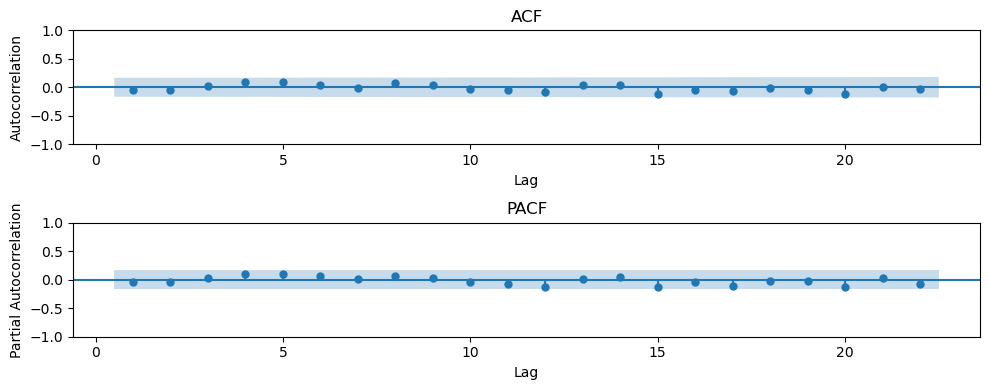

In [25]:
#ACF VALUES
acf_results = sm.tsa.acf(returned_results.resid, alpha=0.05, qstat=True, missing='drop')
acf_coeffs = pd.DataFrame(acf_results[0])
acf_qstat=pd.DataFrame(acf_results[2])
acf_pvalues = pd.DataFrame(acf_results[3].round(5))

#PACF VALUES
pacf_results = sm.tsa.pacf(returned_results.resid, alpha=0.05)
pacf_coeff=pd.DataFrame(pacf_results[0])

show_acf=pd.concat([acf_coeffs, pacf_coeff, acf_qstat, acf_pvalues], axis = 1)
show_acf.columns=['ACF', 'PACF','Qstat','Pvalue']
print(show_acf)

# Tek figür içinde ACF ve PACF
fig, axes = plt.subplots(2, 1, figsize=(10, 4))  # 2 satır, 1 sütun; figür boyutu 10x8

# ACF Plot
sgt.plot_acf(returned_results.resid,
             zero=False,
             alpha=0.05,
             ax=axes[0])
axes[0].set_xlabel("Lag")
axes[0].set_ylabel("Autocorrelation")
axes[0].set_title("ACF")

# PACF Plot
sgt.plot_pacf(returned_results.resid,
              zero=False,
              method='ols',
              ax=axes[1])
axes[1].set_xlabel("Lag")
axes[1].set_ylabel("Partial Autocorrelation")
axes[1].set_title("PACF")

plt.tight_layout()
plt.show()

### TESTING THE COEFFICIENTS OF SINE AND COSINE FUNCTIONS WITH F-TEST

In [27]:
print(returned_results.f_test("sin=cos=0"))
f_value = returned_results.f_test("sin=cos=0").fvalue

<F test: F=3.531487383610128, p=0.0323137948074992, df_denom=121, df_num=2>


### F Statistics

In [29]:
if stocastics_select == "t_c":
    if returned_results.nobs <= 100:
        print(critical_values_t_c_F[(critical_values_t_c_F["T"] == 100)])   
    elif  100 < returned_results.nobs <= 200:
        print(critical_values_t_c_F[(critical_values_t_c_F["T"] == 200)])
    elif  200 < returned_results.nobs <= 500:
        print(critical_values_t_c_F[(critical_values_t_c_F["T"] == 500)]) 
    else:
        print(critical_values_t_c_F[(critical_values_t_c_F["T"] == 2500)]) 
elif stocastics_select == "c":
    if returned_results.nobs <= 100:
        print(critical_values_c_F[(critical_values_c_F["T"] == 100)])   
    elif  100 < returned_results.nobs <= 200:
        print(critical_values_c_F[(critical_values_c_F["T"] == 200)])
    elif  200 < returned_results.nobs <= 500:
        print(critical_values_c_F[(critical_values_c_F["T"] == 500)]) 
    else:
        print(critical_values_c_F[(critical_values_c_F["T"] == 2500)])
else:
    print("Error")

     T    1%    5%   10%
1  200  11.7  8.88  7.62


### t Statistics

In [31]:
if stocastics_select == "t_c":
    if returned_results.nobs <= 100:
        print(critical_values_t_c[(critical_values_t_c["T"] == 100) & (critical_values_t_c["k"] == optimal_k)])   
    elif  100 < returned_results.nobs <= 200:
        print(critical_values_t_c[(critical_values_t_c["T"] == 200) & (critical_values_t_c["k"] == optimal_k)])
    elif  200 < returned_results.nobs <= 500:
        print(critical_values_t_c[(critical_values_t_c["T"] == 500) & (critical_values_t_c["k"] == optimal_k)])
    else:
        print(critical_values_t_c[(critical_values_t_c["T"] == 2500) & (critical_values_t_c["k"] == optimal_k)])
elif stocastics_select == "c":
    if returned_results.nobs <= 100:
        print(critical_values_c[(critical_values_c["T"] == 100) & (critical_values_c["k"] == optimal_k)])   
    elif  100 < returned_results.nobs <= 200:
        print(critical_values_c[(critical_values_c["T"] == 200) & (critical_values_c["k"] == optimal_k)])
    elif  200 < returned_results.nobs <= 500:
        print(critical_values_c[(critical_values_c["T"] == 500) & (critical_values_c["k"] == optimal_k)])
    else:
        print(critical_values_t_c[(critical_values_c["T"] == 2500) & (critical_values_c["k"] == optimal_k)])

    k    T    1%    5%   10%
17  5  200 -4.18 -3.56 -3.24


In [32]:
print("t statistic value of rho:", returned_results.params[0]/returned_results.bse[0])

t statistic value of rho: -2.031125916051947
